# Diabetes Classification

According to the CDC 415 million people in the world have diabetes. 96 million Americans are pre-diabetic and 8 out of 10 of those are not aware of it.

Diabetes is a disease that changes the way the body transforms food into energy. When food is broken down into glucose, the body signals for insulin to be released which allows glucose to enter the cells. However individuals with diabetes do not have enough insulin or cannot use the insulin their body makes. Without medical intervention glucose remains in the blood unable to enter the cells, leading to heart disease, vision loss and kidney disease. There is not currently a cure for diabetes but it is able to be managed through regular glucose monitoring and other lifestyle changes.

There are many steps that can be taken to avoid diabetes, one of them includes living a healthy, active lifestyle. A more detailed look at the risk factors for diabetes can be found at https://www.cdc.gov/diabetes/basics/risk-factors.html 

Accurate classification of a diabetic individual is important because it requires a change of lifestyle and if left untreated will lead to many health complications. The goal of this project is to accurately predict diabetes using machine learning algorithms.

Source of information on diabetes:
https://www.cdc.gov/diabetes/basics/index.html

Description of variables used in this dataset:

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration after 2 hours fasting in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 = non-diabetic, 1 = diabetic)
    
Dataset obtained from Kaggle (https://www.kaggle.com/datasets/mathchi/diabetes-data-set)
which is a subset of a larger dataset from the National Institute of Diabetes and Digestive and Kidney Diseases

In [1]:
import os
# view and change current working directory
path = os.getcwd()
print('old directory is ', path)
os.chdir('/Users/david/Desktop/python_datasets')
print('current directory is', os.getcwd())

old directory is  C:\Users\david
current directory is C:\Users\david\Desktop\python_datasets


In [2]:
# import packages for data importation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import dataset
diabetes_data = pd.read_csv("diabetes_data.csv")
# print first 5 rows of the dataset 
print(diabetes_data.head())
# view what the data types of the variables are
print(diabetes_data.dtypes)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome        

By looking at the first 5 rows of each variable, it appears to have read the file properly. The datatype of all variables are numeric (integers and float). Next I will look for any null values within the data.

In [3]:
# look for null values
print(diabetes_data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


This dataset does not have any null values, so we can move forward with exploratory data analysis.

In [4]:
# look at descriptive statistics of dataset
print(diabetes_data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

Some notes on glucose from the cdc (source: https://www.cdc.gov/diabetes/basics/getting-tested.html )
< 140 normal   140<x<199 is prediabetic and 200+ is diabetic.

Insulin and SkinThickness both have a 25th percentile of 0 so it will be worth investigating for data entry errors. 

BMI has a min of 0 which cannot happen, as the formula for BMI is the weight (in kg) divided by the height (in meters) squared.
(source: https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html)
So unless the weight drops to zero this dataset may have used 0 to notate any missing values. This possibility will be explored by viewing histograms of the variables and looking for inconsistencies in the data. But first lets look both the variance and normalized variances of the variables.

In [5]:
# print variance of the dataset variables
print("Variance \n", diabetes_data.var(), "\n")

#print normalized variances
diabetes_data_norm = diabetes_data / diabetes_data.mean()
print("Normalized variance \n", diabetes_data_norm.var())

Variance 
 Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64 

Normalized variance 
 Pregnancies                 0.767974
Glucose                     0.069943
BloodPressure               0.078451
SkinThickness               0.603380
Insulin                     2.085627
BMI                         0.060731
DiabetesPedigreeFunction    0.493017
Age                         0.125166
Outcome                     1.868104
dtype: float64


The insulin has a high variance, may need to transform the variable to increase accuracy of prediction. 

In the following sections of code, I will plot histograms of the data to look at the distribution of the data.

(array([318., 206., 136.,  58.,  25.,  15.,   3.,   3.,   1.,   3.]),
 array([0.078 , 0.3122, 0.5464, 0.7806, 1.0148, 1.249 , 1.4832, 1.7174,
        1.9516, 2.1858, 2.42  ]),
 <BarContainer object of 10 artists>)

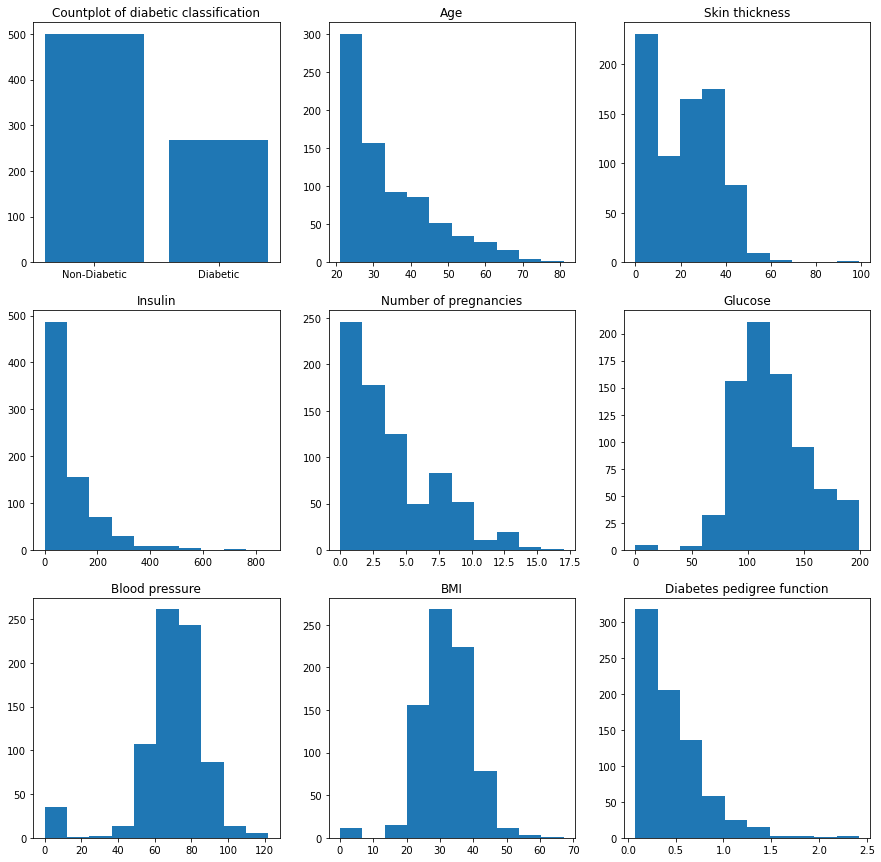

In [6]:
# There are 9 variables, create a 3x3 subplot to visualize and inspect the distribution of all the data
fig, ax = plt.subplots(3,3)
fig.set_figheight(15)
fig.set_figwidth(15)

# create variable that gives a count of each outcome
outcome_counts = diabetes_data["Outcome"].value_counts()

# outcome
ax[0,0].set_title("Countplot of diabetic classification")
ax[0,0].bar(outcome_counts.index, outcome_counts.values)
ax[0,0].set_xticks([0, 1])
ax[0,0].set_xticklabels(["Non-Diabetic", "Diabetic"])

# age
ax[0,1].set_title("Age")
ax[0,1].hist(diabetes_data.Age)

# skin thickness
ax[0,2].set_title("Skin thickness")
ax[0,2].hist(diabetes_data.SkinThickness)

# insulin
ax[1,0].set_title("Insulin")
ax[1,0].hist(diabetes_data.Insulin)

# pregnancies
ax[1,1].set_title("Number of pregnancies")
ax[1,1].hist(diabetes_data.Pregnancies)

# glucose
ax[1,2].set_title("Glucose")
ax[1,2].hist(diabetes_data.Glucose)

# blood pressure
ax[2,0].set_title("Blood pressure")
ax[2,0].hist(diabetes_data.BloodPressure)

# BMI
ax[2,1].set_title("BMI")
ax[2,1].hist(diabetes_data.BMI)

# diabetes pedigree function
ax[2,2].set_title("Diabetes pedigree function")
ax[2,2].hist(diabetes_data.DiabetesPedigreeFunction)

From the subplots above, there are some variables that should be scaled in order for them to more closely resemble normal distribution which will help the accuracy of the machine learning algorithms. Insulin and diabetes pedigree function are right skewed and will be individually transformed and compared to the original distribution to observe the diffrences in the transformations. Age and number of pregnancies are both right skewed, however this is to be expected.

There are many variables that have outliers at zero, this could be from the data entry process where zero was input for missing values. This possiblility will be assessed separately with each variable because some variables cannot be zero such as BMI.

Some values will need log transformed and contain zero so we will add 1 to the variable to keep the data on the same scale and avoid log(0) = -infinity.

Variance of insulin: 13281.18
Variance of insulin when "0" values are removed: 14107.703775461428
Variance of log(insulin): 9.49
Variance of square root of insulin: 43.49


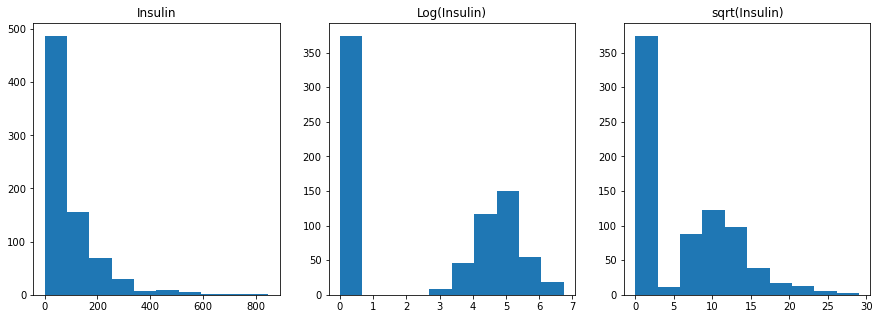

In [7]:
# inspect Insulin
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(15)

# Insulin
ax[0].set_title("Insulin")
ax[0].hist(diabetes_data.Insulin)

# log insulin
diabetes_data["log_ins"] = np.log(diabetes_data["Insulin"] + 1)
ax[1].set_title("Log(Insulin)")
ax[1].hist(diabetes_data["log_ins"])

# Sqrt Insulin
insulin_sqrt = np.sqrt(diabetes_data['Insulin'])
ax[2].set_title("sqrt(Insulin)")
ax[2].hist(insulin_sqrt)

var_insulin = diabetes_data['Insulin'].var()
print('Variance of insulin:', round(var_insulin, 2))

insulin_gt0 = diabetes_data['Insulin'][diabetes_data['Insulin'] > 0]
var_ins_gt0 = insulin_gt0.var()
print('Variance of insulin when "0" values are removed:', var_ins_gt0)

var_insulin_log = np.log(diabetes_data['Insulin'].var())
print('Variance of log(insulin):', round(var_insulin_log, 2))

var_insulin_sqrt = insulin_sqrt.var()
print('Variance of square root of insulin:', round(var_insulin_sqrt, 2))

There is a lot of missing data for this vavriable, in the log(Insulin) plot the missing values are at '0' and accounts for nearly half of the data in this dataset. This is too much data to be imputed by the mean becuase it would cause a very high peak at the mean. These missing values will be removed.

Insulin levels have a large variance in this dataset. This is because type of diabetes can cause a person to make very little insulin, or they could be unable to use the insulin that they make. Thus, it is no suprise that insulin has a large variance.  Using the log transformed insuln results in the lowest variance and a bell shaped curve but has a peak for the lower insulin level. The sqrt tranformation also greatly reduces the variance but also has a peak for lower levels and is right skewed. I will continue with the log transformation of insulin.

I also calculated the variance of insulin when the values of zero insulin are removed. This is increased the variance because of the data being right skewed.

(array([ 79., 203., 163., 129., 107.,  43.,  27.,   8.,   5.,   4.]),
 array([0.2792848 , 0.40691981, 0.53455482, 0.66218984, 0.78982485,
        0.91745986, 1.04509487, 1.17272988, 1.3003649 , 1.42799991,
        1.55563492]),
 <BarContainer object of 10 artists>)

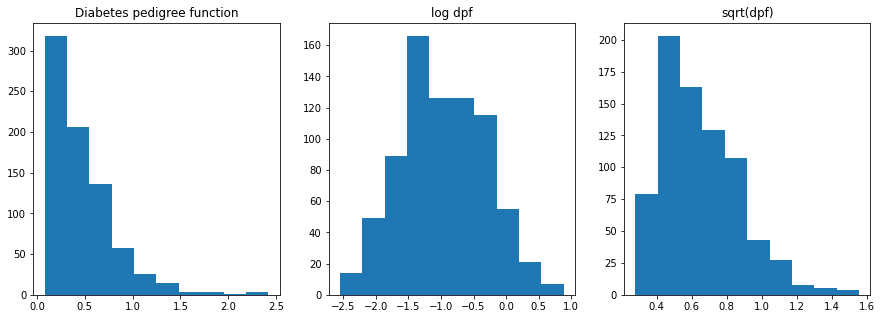

In [8]:
# inspect diabetes pedigree function
fig, ax = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(15)

# dpf
ax[0].set_title("Diabetes pedigree function")
ax[0].hist(diabetes_data.DiabetesPedigreeFunction)

# log dpf
diabetes_data['dpf_log'] = np.log(diabetes_data.DiabetesPedigreeFunction)
ax[1].set_title("log dpf")
ax[1].hist(diabetes_data['dpf_log'])

# sqrt dpf
dpf_sqrt = np.sqrt(diabetes_data.DiabetesPedigreeFunction)
ax[2].set_title("sqrt(dpf)")
ax[2].hist(dpf_sqrt)

The log transformation of the Diabetes Pedigree Function (dpf) is close to a normal distribution, so it will be used in the analysis moving forward.

(array([ 59., 141., 181., 118.,  36.,   4.,   1.,   0.,   0.,   1.]),
 array([ 7. , 16.2, 25.4, 34.6, 43.8, 53. , 62.2, 71.4, 80.6, 89.8, 99. ]),
 <BarContainer object of 10 artists>)

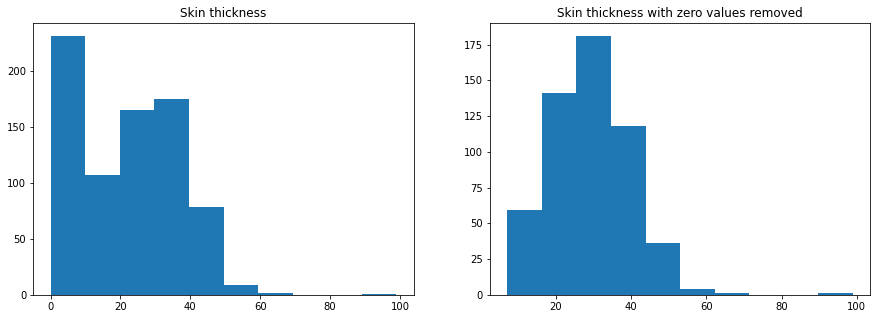

In [9]:
# Inspect SkinThickness
fig, ax = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)

# Skin thickness
ax[0].set_title("Skin thickness")
ax[0].hist(diabetes_data.SkinThickness)

# skin thickness with zeroes removed
skin_gt0 = diabetes_data.SkinThickness[diabetes_data.SkinThickness > 0]
ax[1].set_title("Skin thickness with zero values removed")
ax[1].hist(skin_gt0)

Removing the zero values from the skin thickness variable gives a histogram that is slightly right skewed with an outlier at 99mm (or 3.8 inches). The tricep skin fold thickness of 0mm is unreasonable, and once removed the minimum skin thickness is 7mm (or approximately 1/4 inch) which is a more reasonable measure. 

(array([ 14.,  49.,  89., 166., 126., 126., 115.,  55.,  21.,   7.]),
 array([-2.55104645, -2.20756505, -1.86408365, -1.52060225, -1.17712086,
        -0.83363946, -0.49015806, -0.14667666,  0.19680474,  0.54028614,
         0.88376754]),
 <BarContainer object of 10 artists>)

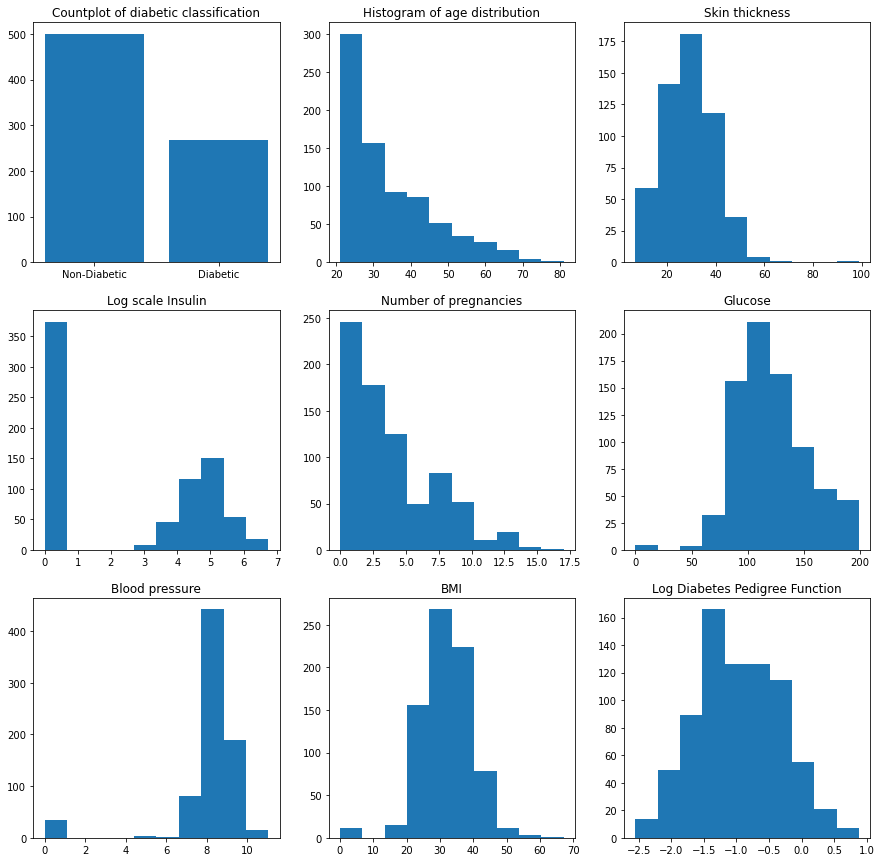

In [10]:
# Create a 3x3 subplot to visualize the variables to be used in analysis
fig, ax = plt.subplots(3,3)
fig.set_figheight(15)
fig.set_figwidth(15)

# outcome
outcome_counts = diabetes_data["Outcome"].value_counts()
ax[0,0].set_title("Countplot of diabetic classification")
ax[0,0].bar(outcome_counts.index, outcome_counts.values)
ax[0,0].set_xticks([0, 1])
ax[0,0].set_xticklabels(["Non-Diabetic", "Diabetic"])
# age
ax[0,1].set_title("Histogram of age distribution")
ax[0,1].hist(diabetes_data.Age)
# skin thickness
ax[0,2].set_title("Skin thickness")
ax[0,2].hist(skin_gt0)
# insulin log scale
ax[1,0].set_title("Log scale Insulin")
ax[1,0].hist(diabetes_data.log_ins)
# pregnancies
ax[1,1].set_title("Number of pregnancies")
ax[1,1].hist(diabetes_data.Pregnancies)
# glucose
ax[1,2].set_title("Glucose")
ax[1,2].hist(diabetes_data.Glucose)
# blood pressure
bp_sqrt = np.sqrt(diabetes_data.BloodPressure)
ax[2,0].set_title("Blood pressure")
ax[2,0].hist(bp_sqrt)
# BMI
ax[2,1].set_title("BMI")
ax[2,1].hist(diabetes_data.BMI)
# diabtes pedigree function
ax[2,2].set_title("Log Diabetes Pedigree Function")
ax[2,2].hist(diabetes_data['dpf_log'])

The zero values in skin thickness, insulin, glucose, blood pressure and bmi will be removed because through the dataset is supsected of using '0' as a missing or null value.

In [11]:
# used log_insulin != 0 for a filter because 1 was added to the original value, so all the values that had originally
# were 0 on the normal scale are 0 in the log scale because log(1) = 0
diabetes_data_gt0 = diabetes_data[(diabetes_data["SkinThickness"] != 0) & 
                                  (diabetes_data["log_ins"] != 0) & 
                                  (diabetes_data["Glucose"] != 0) & 
                                  (diabetes_data["BloodPressure"] != 0) & 
                                  (diabetes_data["BMI"] != 0)]

# drop insulin and dpf variable becuase the log transformation was used
diabetes_data_gt0 = diabetes_data_gt0.drop(['Insulin', 'DiabetesPedigreeFunction'], axis=1)

In [12]:
# separate the data into 2 datasets
X = diabetes_data_gt0.drop('Outcome', axis=1).values
y = diabetes_data_gt0['Outcome'].values

# import all necessary modules for prediction
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.utils import resample
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from interpret import show

# split data into testing and training sets, keeping 20% of data for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

The first method for prediction will be using a pipeline to combine priciple component analysis (PCA), standard scaler and logistic regresion. PCA will choose the minimal number of compnents for the model without sacrificing accuracy. Standard scaler will put all the variables in the same scale because most estimators in machine learning require standardization, or at the very least will work better with standardization. Logistic regression will allow modeling the binary response variable. 

# Logistic Regression

In [13]:
# write function to calculate scores for model
def scores(X_test, y_test, model):
    y_pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)[:,1]
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, pred_proba)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(matrix)
    
    print("Model Scores \n",
      "Best Parameter: ", model.best_params_, "\n",
      "Accuracy: ", accuracy, "\n",
      "F1: ", f1, "\n", 
      "Precision: ", precision, "\n",
      "Recall: ", recall, "\n",
      "AUC-ROC: ", auc)
    display.plot()
    plt.show()

Model Scores 
 Best Parameter:  {'pca__n_components': 8, 'logistic__solver': 'liblinear', 'logistic__C': 4.137931034482768} 
 Accuracy:  0.7848101265822784 
 F1:  0.6666666666666667 
 Precision:  0.6296296296296297 
 Recall:  0.7083333333333334 
 AUC-ROC:  0.8416666666666667


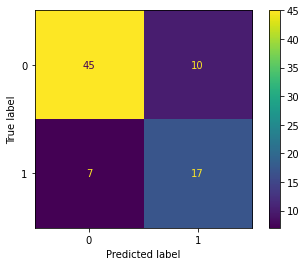

In [14]:
# instantiate
pca = PCA(random_state=1)
scaler = StandardScaler()
logistic = LogisticRegression(max_iter=10000, random_state=1)

# build pipeline and grid
pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('logistic', logistic)])

param_grid = {
    "pca__n_components": np.linspace(4, 8, 5, dtype=int),
    "logistic__C": np.linspace(1e-14, 60, 30),
    "logistic__solver": ['liblinear']
}
# fit model and print scores
logreg1 = RandomizedSearchCV(estimator = pipe, param_distributions = param_grid, n_jobs=-1, random_state=1)
logreg1.fit(X_train, y_train)

scores(X_test, y_test, logreg1)

A Randomized search cross validation shows the parameters that gave the best results of a large range of hyperparameters. Now I can use a more targeted grid search for a more in depth scan through the hyperparameters in the model chosen above.

Model Scores 
 Best Parameter:  {'logistic__C': 2.66666666666667, 'logistic__solver': 'liblinear', 'pca__n_components': 8} 
 Accuracy:  0.7848101265822784 
 F1:  0.6666666666666667 
 Precision:  0.6296296296296297 
 Recall:  0.7083333333333334 
 AUC-ROC:  0.8424242424242424


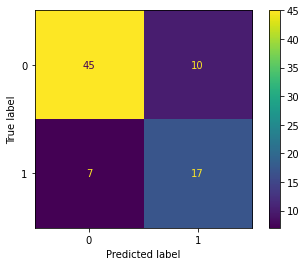

In [15]:
# build parameter grid
param_grid = {
    "pca__n_components": [8],
    "logistic__C": np.linspace(1e-14, 4, 10),
    "logistic__solver": ['liblinear']
}
# fit model and print scores
logreg2 = GridSearchCV(pipe, param_grid, n_jobs=2)
logreg2.fit(X_train, y_train)

scores(X_test, y_test, logreg2)

The accuracy of the chosen model through the gridsearch stayed the same, without much improvement on the AUC-ROC score which is now at about 84%. The confusion matrix shows 17 incorrecty predicted and 62 that were correctly predicted.

Some other metrics used in this analysis are precision, recall and the f1-score. The precision score penalizes when there are false positives, recall penalizes false negatives and the f1-score is a weighted average of recall and precision. These are important to calculate because a false negative can have much different implications that a false positive. In the case of this dataset a false negative means that the diabetic persion is left untreated while a false positive means that they undergo more tests, monitoring and possibly recieve medication. While both false predictions are certainly undesirable, this project will focus on recall because undetected diabetes poses more of a danger because they will most likey have less monitoring to correct the mis-diagnosis. 

The the f1 score above is about 67% and the recall is 71%. More models will be fit in an attempt to increase these scores. 


# Upsampling

Sampling techniques can help improve prediction accuracy. Upsampling  is used for unbalanced data that has few datapoints for one of the outcomes, such as being diabetic. The upsampled dataset will have equal observations for each outcome.

In [16]:
# instantiate SMOTE()
smote = SMOTE(random_state=1)
# the train is used to be upsampled
X_train_upsampled, y_train_upsampled = smote.fit_resample(X_train, y_train)

Model Scores 
 Best Parameter:  {'pca__n_components': 7, 'logistic__solver': 'liblinear', 'logistic__penalty': 'l2', 'logistic__C': 2.782559402207126} 
 Accuracy:  0.7468354430379747 
 F1:  0.6428571428571429 
 Precision:  0.5625 
 Recall:  0.75 
 AUC-ROC:  0.8583333333333334


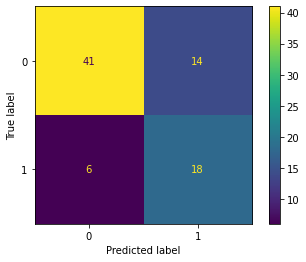

In [17]:
# the pipeline has been defined in the last gridsearch and will be re-used with the upsampled data
# define pparameters to be searched
param_grid = {
    "pca__n_components": np.linspace(1, 8, 8, dtype=int),
    "logistic__C": np.logspace(-4, 4, 10),
    "logistic__solver": ['liblinear'],
    "logistic__penalty": ['l1', 'l2']
}
upsample1 = RandomizedSearchCV(estimator = pipe, 
                               param_distributions = param_grid, 
                               n_jobs=2,
                               n_iter = 20,
                               random_state=1)
upsample1.fit(X_train_upsampled, y_train_upsampled)

scores(X_test, y_test, upsample1)

Model Scores 
 Best Parameter:  {'logistic__C': 2.5, 'logistic__penalty': 'l2', 'logistic__solver': 'liblinear', 'pca__n_components': 7} 
 Accuracy:  0.7468354430379747 
 F1:  0.6428571428571429 
 Precision:  0.5625 
 Recall:  0.75 
 AUC-ROC:  0.8583333333333334


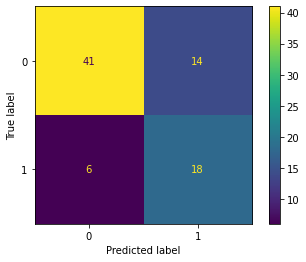

In [18]:
param_grid = {
    "pca__n_components": [7],
    "logistic__C": np.linspace(2.5, 2.7, 10),
    "logistic__solver": ['liblinear'],
    "logistic__penalty": ['l2']
}
upsample2 = GridSearchCV(pipe, param_grid, n_jobs=-1)
upsample2.fit(X_train_upsampled, y_train_upsampled)

scores(X_test, y_test, upsample2)

The Accuracy score of the logistic regression model was better than this upsampling model, however the recall is 75% and the precision id 56%. Another model will be fit to try and increase the precision without sacrificing recall.

# Explainable Boosting

An Explainable Boosting Machine will now be applied to the data. This is a generalized additive model that is able to automatically detect for interaction between variables and provide an easily interpretable output. This model will be fit using the upsampled dataset.

Model Scores 
 Accuracy:  0.7721518987341772 
 F1:  0.6896551724137931 
 Precision:  0.5882352941176471 
 Recall:  0.8333333333333334 
 AUC-ROC:  0.831060606060606


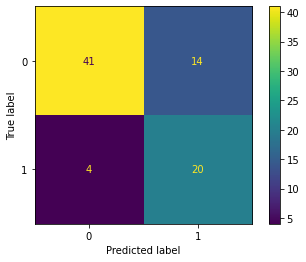

In [19]:
# create variables in order to keep labels for explainable AI
x_label = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "BMI", "Age", "log_ins", "dpf_log"]
y_label = ["Outcome"]
# separate the dataset 
X = diabetes_data_gt0[x_label]
y = diabetes_data_gt0[y_label]

# split data into testing and training sets, keeping 20% of data for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


ebm = ExplainableBoostingClassifier(random_state=1,
                                    early_stopping_rounds = 500,
                                    max_leaves=5, 
                                    interactions=10,
                                    inner_bags=0,
                                    binning='quantile_humanized')
ebm.fit(X_train_upsampled, y_train_upsampled)

# write new function for scores that works without best_params
def final_scores(X_test, y_test, model):
    y_pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)[:,1]
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, pred_proba)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(matrix)
    
    print("Model Scores \n",
      "Accuracy: ", accuracy, "\n",
      "F1: ", f1, "\n", 
      "Precision: ", precision, "\n",
      "Recall: ", recall, "\n",
      "AUC-ROC: ", auc)
    display.plot()
    plt.show()
final_scores(X_test, y_test, ebm)

In [20]:
ebm_global = ebm.explain_global()
show(ebm_global) 

C:\Users\david\anaconda3\lib\site-packages\interpret\visual\udash.py:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
C:\Users\david\anaconda3\lib\site-packages\interpret\visual\udash.py:6: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\david\anaconda3\lib\site-packages\interpret\visual\udash.py:7: UserWarning: 
The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`
  import dash_table as dt


<!-- http://127.0.0.1:7001/1771814233184/ -->

The explainable boosting model (EBM) has an overall accuracy of 77% and a recall score of 83%. This will be the chosen model for diabetes classification becuase the focus was put on finding a model with high recall.

# Explainable Booting with Upsampling
Now a model will be fit that combines upsampling, a pipeline and explainable boosting. 

Model Scores 
 Best Parameter:  {'ebm__interactions': 11, 'ebm__inner_bags': 5} 
 Accuracy:  0.810126582278481 
 F1:  0.6666666666666666 
 Precision:  0.7142857142857143 
 Recall:  0.625 
 AUC-ROC:  0.8393939393939395


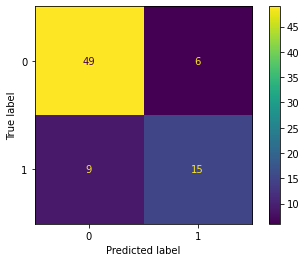

In [22]:
# create variables in order to keep labels for explainable AI
x_label = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "BMI", "Age", "log_ins", "dpf_log"]
y_label = ["Outcome"]
# separate the dataset 
X = diabetes_data_gt0[x_label]
y = diabetes_data_gt0[y_label]

# split data into testing and training sets, keeping 20% of data for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

smote = SMOTE()

X_train_upsampled, y_train_upsampled = smote.fit_resample(X_train, y_train)

pca = PCA(n_components=8, random_state=1)
scaler = StandardScaler()
ebm = ExplainableBoostingClassifier(random_state=1,
                                    max_leaves = 5,
                                    binning = 'quantile_humanized',
                                    early_stopping_rounds = 500)

pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('ebm', ebm)])
param_grid = {
    "ebm__inner_bags": [0, 5],
    "ebm__interactions": [10, 11, 12]
}
ebm1 = RandomizedSearchCV(estimator = pipe, 
                               param_distributions = param_grid,
                               return_train_score = True,
                               n_iter = 3,
                               n_jobs = -1, 
                               error_score = 'raise',
                               random_state = 1)
ebm1.fit(X_train, y_train)

scores(X_test, y_test, ebm1)

While this model provides the best accuracy (81%), recall is only about 63% and the precision is 71%. This project focuses on recall, thus in this model a 12% gain in precision is not worth a 20% loss of recall. The f1 scores from the explainable boosting model and the explainable boosting pipeline model differ by about 2% so they are somwhat similar. If the goal was overall accuracy or precision this would have been the chosen model.

In choosing the explainable boosting model with lower accuracy but higher recall. There will be more false positive, more people coming in for follow-up appointments but fewer individuals being left untreated for diabetes.